<a href="https://colab.research.google.com/github/soumyabrataroy/Analytics_Vidya_DataHour_with_Soumyabrata/blob/main/Analytic_Vidya_DataHour_with_Soumyabrata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Data Management using Pandas

In [ ]:
# installing pandas package
!pip install pandas

Pandas API: https://pandas.pydata.org/docs/reference/index.html <br>
Inslallation manual: https://pandas.pydata.org/docs/getting_started/install.html

In [70]:
# importing libraris
import pandas as pd               # data manupulation library
import numpy as np                # numerical computing library
import matplotlib.pyplot as plt   # visualization library
import seaborn as sns             # visualization library

In [71]:
# checking pandas version
print(pd.__version__)

1.3.5


#### Data sourcing

In [72]:
# Getting data. Right now reading the batch data
titanic = pd.read_csv("titanic.csv")
summer_olympic = pd.read_csv("summer.csv")

In [73]:
summer_olympic[:2] # you can use [:number of rows]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [74]:
titanic.head(2) # or can use head(number of rows) method

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C


Free machine learning data sources<br>
Kaggle: https://www.kaggle.com/datasets <br>
UCI ML repo: https://archive.ics.uci.edu/ml/index.php

In [75]:
# Find out the objective of the problem
# for titanic dataset it is who survived or not
# for summer olympic dataset it is who own gold, silver or bronze medal

#### Data Understanding

In [76]:
# is there any null values available?
print(titanic.isnull().sum())
print(titanic.isnull().mean())

# print(summer_olympic.isnull().sum())
# print(summer_olympic.isnull().mean())

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64
survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
embarked    0.002245
deck        0.772166
dtype: float64


In [77]:
# titanic data set features
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [78]:
# basic statistical property of the dataset
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [79]:
titanic.head(10) # checking top 10 rows of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [80]:
titanic[titanic['age'].isnull()]['sex'].value_counts() # checking the sex ratio of age null values

male      124
female     53
Name: sex, dtype: int64

In [81]:
titanic[titanic['age'].isnull()]['survived'].value_counts() # checking survive ratio of age null values

0    125
1     52
Name: survived, dtype: int64

In [82]:
titanic['age'].mean() # overall age mean

29.69911764705882

In [83]:
# relationship of survival with age
print(titanic.groupby('survived')['age'].mean())
print(titanic.groupby('survived')['age'].median())

survived
0    30.626179
1    28.343690
Name: age, dtype: float64
survived
0    28.0
1    28.0
Name: age, dtype: float64


In [84]:
# checking average age if they survived or not and what was their sex
age_imputation = titanic.groupby(['survived','sex'])['age'].mean().reset_index()
age_imputation

,survived,sex,age
0,0,female,25.046875
1,0,male,31.618056
2,1,female,28.847716
3,1,male,27.276022


##### Age imputation

In [85]:
# separate two datasets
titanic_age_null =  titanic[titanic['age'].isnull()]
titanic_age_not_null =  titanic[titanic['age'].notnull()]

In [86]:
# dropping age columns from titanic_age_null, because we are going to add it again
titanic_age_null = titanic_age_null.drop(['age'], axis = 1)

In [87]:
# imputing the calculated age 
titanic_age_null = titanic_age_null.merge(age_imputation, on =['survived','sex'], how ='left')
titanic_age_null

,survived,pclass,sex,sibsp,parch,fare,embarked,deck,age
0,0,3,male,0,0,8.4583,Q,NaN,31.618056
1,1,2,male,0,0,13.0000,S,NaN,27.276022
2,1,3,female,0,0,7.2250,C,NaN,28.847716
3,0,3,male,0,0,7.2250,C,NaN,31.618056
4,1,3,female,0,0,7.8792,Q,NaN,28.847716
...,...,...,...,...,...,...,...,...,...
172,0,3,male,0,0,7.2292,C,NaN,31.618056
173,0,3,female,8,2,69.5500,S,NaN,25.046875
174,0,3,male,0,0,9.5000,S,NaN,31.618056
175,0,3,male,0,0,7.8958,S,NaN,31.618056


In [88]:
# recreating the whole dataset again
titanic_age_imputed = pd.concat([titanic_age_not_null,titanic_age_null], axis =0)
titanic_age_imputed

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
172,0,3,male,31.618056,0,0,7.2292,C,NaN
173,0,3,female,25.046875,8,2,69.5500,S,NaN
174,0,3,male,31.618056,0,0,9.5000,S,NaN
175,0,3,male,31.618056,0,0,7.8958,S,NaN


In [89]:
# checking null values
titanic_age_imputed.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [90]:
# rechecking relationship of survival with age. It has changed from previous dstribution.
print(titanic_age_imputed.groupby('survived')['age'].mean())
print(titanic_age_imputed.groupby('survived')['age'].median())

survived
0    30.648537
1    28.346796
Name: age, dtype: float64
survived
0    31.618056
1    28.847716
Name: age, dtype: float64


#### Data visualization

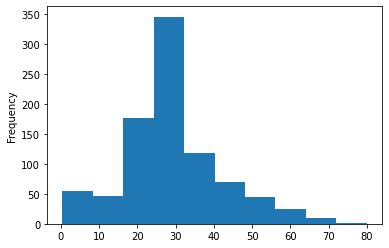

In [91]:
# pandas have built in visualizations
# you can use at any time you want. I will show some of the data visualizations
titanic_age_imputed['age'].plot(kind='hist')

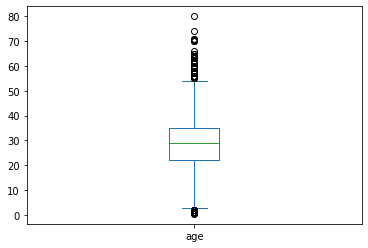

In [92]:
# box plot can help you identify outliers in the data
titanic_age_imputed['age'].plot(kind='box')

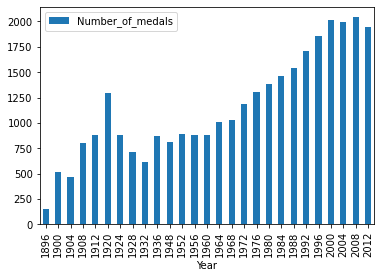

In [93]:
# summer olympic dataset countplot
summer_olympic_numberofmedal = summer_olympic.groupby('Year')['Medal'].count().reset_index(name='Number_of_medals')
summer_olympic_numberofmedal.set_index('Year').plot(kind = 'bar')

Pandas plots: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html<br>
Matplotlib: https://matplotlib.org/stable/gallery/index.html<br>
Seaborn: https://seaborn.pydata.org/examples/index.html<br>
Plotly: https://plotly.com/python/

#### Feature Creation ... Extraction

In [94]:
# checking relationship with object and features
# for categorical features we can use crosstab
pd.crosstab(titanic_age_imputed['pclass'],titanic_age_imputed['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [95]:
pd.crosstab(titanic_age_imputed['sex'],titanic_age_imputed['survived']) # relation between sex and survival

survived,0,1
sex,,
female,81,233
male,468,109


In [96]:
# checking the relationship with passenger class and fare
titanic_age_imputed.groupby('pclass')['fare'].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [97]:
# summer olympic dataset contains mostly categorical features
# we need to convert categorical features to numerical to train the model
summer_olympic

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [98]:
# checking if there is any null values
print(summer_olympic.isnull().sum())
print(summer_olympic.isnull().mean())

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64
Year          0.000000
City          0.000000
Sport         0.000000
Discipline    0.000000
Athlete       0.000000
Country       0.000128
Gender        0.000000
Event         0.000000
Medal         0.000000
dtype: float64


In [99]:
# checking rows contains null values
summer_olympic[summer_olympic['Country'].isnull()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [100]:
summer_olympic[~summer_olympic['Country'].isnull()][:3] # we can use ~ to filter the data opposite way

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [101]:
# checking in not null values if there is any athletes where it is given as Pending
(summer_olympic[~summer_olympic['Country'].isnull()]['Athlete']=='Pending').value_counts()

False    31161
Name: Athlete, dtype: int64

In [102]:
# because null values are < 5% of whole data size we can safely remove the null values
summer_olympic = summer_olympic.dropna()
print(summer_olympic.isnull().sum())

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64


##### Feature creation

In [103]:
# feature 1: how many times a particular country got Gold, Silver or Bronch medal between 1896 to 2012
medal_by_country = summer_olympic.groupby(['Country','Medal'])['Year'].count().reset_index(name='country_medal_count')
# merging the column with the main data
summer_olympic = summer_olympic.merge(medal_by_country,on = ['Country','Medal'], how = 'left') # merge in pandas issimilar to join in SQL
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81


In [104]:
# feature 2: getting dummy variable of gender column
summer_olympic['Gender_binary'] = pd.get_dummies(summer_olympic['Gender'],drop_first=True)
summer_olympic[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,52,0


In [105]:
# feature 3: converting every Medal to a number lebel
def lebel_encoder(x):
    if x == 'Gold':
        return 1
    elif x == 'Silver':
        return 2
    else:
        return 3

summer_olympic['Medal_lebel'] = summer_olympic['Medal'].apply(lebel_encoder)
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Medal_lebel
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,2


In [106]:
# checking how many Discipline belongs to a particula Sports
summer_olympic.groupby('Sport')['Discipline'].nunique()

Sport
Aquatics             7
Archery              1
Athletics            1
Badminton            1
Baseball             1
Basketball           1
Basque Pelota        1
Boxing               1
Canoe                2
Canoe / Kayak        2
Cricket              1
Croquet              1
Cycling              5
Equestrian           4
Fencing              1
Football             1
Golf                 1
Gymnastics           5
Handball             1
Hockey               1
Ice Hockey           1
Jeu de paume         1
Judo                 1
Lacrosse             1
Modern Pentathlon    2
Polo                 1
Rackets              1
Roque                1
Rowing               1
Rugby                1
Sailing              1
Shooting             1
Skating              1
Softball             1
Table Tennis         1
Taekwondo            1
Tennis               1
Triathlon            1
Tug of War           1
Volleyball           3
Water Motorsports    1
Weightlifting        1
Wrestling            3
Name:

In [107]:
# feature 4: how many times a discipline belongs to a particula lebel appeared in the whole dataset (or got medal)
# We know there is a strong relationship between Sports and desipline. We are creating a feature using cardinality
summer_olympic['Sport_discipline'] = summer_olympic['Sport'] + '_' + summer_olympic['Discipline']
Sport_discipline = summer_olympic['Sport_discipline'].value_counts().reset_index(name = 'Sport_discipline_cardinality')
Sport_discipline[:2]

,index,Sport_discipline_cardinality
0,Athletics_Athletics,3637
1,Rowing_Rowing,2667


In [108]:
# adding the Sport_discipline feature to the main dataset
summer_olympic = summer_olympic.merge(Sport_discipline, left_on = 'Sport_discipline',right_on = 'index', how = 'left')
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Medal_lebel,Sport_discipline,index,Sport_discipline_cardinality
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,1,Aquatics_Swimming,Aquatics_Swimming,2628
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,2,Aquatics_Swimming,Aquatics_Swimming,2628


In [109]:
# feature 5: average number of medals a particular event got among all countries
summer_olympic_event = summer_olympic.groupby('Event')['country_medal_count'].mean().reset_index(name = 'Event_country_medal_count')
summer_olympic = summer_olympic.merge(summer_olympic_event, on = 'Event', how = 'left')
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Medal_lebel,Sport_discipline,index,Sport_discipline_cardinality,Event_country_medal_count
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,1,Aquatics_Swimming,Aquatics_Swimming,2628,801.75
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,2,Aquatics_Swimming,Aquatics_Swimming,2628,801.75


In [110]:
# selecting only required columns for the modeling building
summer_olympic_model_data = summer_olympic[['Year',
       'country_medal_count','Gender_binary',
       'Sport_discipline_cardinality', 'Event_country_medal_count','Medal_lebel']]
summer_olympic_model_data[:3]
# country_medal_count: represents a country category
# Gender_binary: represents a gender category
# Sport_discipline_cardinality: represents sports and discipline category
# Event_country_medal_count: represents the event category
# Medal_lebel: represents the medal category

,Year,country_medal_count,Gender_binary,Sport_discipline_cardinality,Event_country_medal_count,Medal_lebel
0,1896,412,0,2628,801.750000,1
1,1896,81,0,2628,801.750000,2
2,1896,52,0,2628,49.333333,3


#### Model building

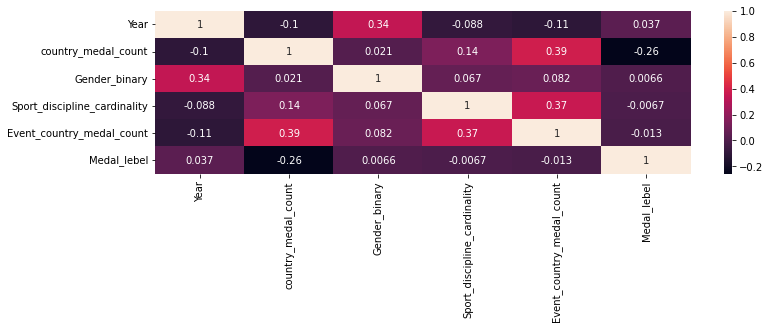

In [111]:
# checking the correlation among the features
plt.figure(figsize=(12,3))
sns.heatmap(summer_olympic_model_data.corr(),annot=True)

In [112]:
# if there are highly correlated values are there in the feature we can use non parametric model like KNN, Random forest, XGBoost, Light GBM, CatBoost
# if there are not very correlation we can use parametric models like Logistic regression, SVM etc.

In [113]:
# checking if the dataset is imbalance
summer_olympic_model_data['Medal_lebel'].value_counts()

1    10484
3    10369
2    10308
Name: Medal_lebel, dtype: int64

In [114]:
# creating the trainin (70%) and validation data (30%)
# training data: model training and testing
# validation data: validating the model on unseen data

from sklearn.model_selection import train_test_split
training_data, validation_data = train_test_split(summer_olympic_model_data,test_size=0.3,shuffle= True, stratify=summer_olympic_model_data['Medal_lebel'],random_state=42)
print('training data shape',training_data.shape)
print('validation data shape',validation_data.shape)

training data shape (21812, 6)
validation data shape (9349, 6)


In [115]:
# checking if both the data have similar distribution among lebels
print(training_data['Medal_lebel'].value_counts())
print(validation_data['Medal_lebel'].value_counts())

1    7339
3    7258
2    7215
Name: Medal_lebel, dtype: int64
1    3145
3    3111
2    3093
Name: Medal_lebel, dtype: int64


In [127]:
# splitting the data into train (75%) test (25%) split for model training
X = training_data.drop(['Medal_lebel'],axis=1).values   # independant features
y = training_data['Medal_lebel'].values					        # dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True, stratify=y, random_state=42)


In [128]:
# Model training
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42,n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [129]:
# Model prediction
y_pred = forest.predict(X_test)

#### Model Validation

In [130]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90      1835
           2       0.89      0.87      0.88      1804
           3       0.86      0.88      0.87      1814

    accuracy                           0.89      5453
   macro avg       0.89      0.89      0.89      5453
weighted avg       0.89      0.89      0.89      5453

[[1653   73  109]
 [  91 1571  142]
 [  92  117 1605]]
0.885567577480286


In [131]:
# validating our results
X_val = validation_data.drop(['Medal_lebel'],axis=1).values   # independant features
y_val = validation_data['Medal_lebel'].values					        # dependant variable

y_val_pred = forest.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91      3145
           2       0.90      0.87      0.89      3093
           3       0.86      0.90      0.88      3111

    accuracy                           0.89      9349
   macro avg       0.89      0.89      0.89      9349
weighted avg       0.89      0.89      0.89      9349

[[2852  117  176]
 [ 131 2696  266]
 [ 139  178 2794]]
0.8922879452347845


In [132]:
# checking first 20 results
pd.DataFrame(np.concatenate((y_val.reshape(-1,1),y_val_pred.reshape(-1,1)),axis=1), columns = ['actual','predicted'])[:20]

,actual,predicted
0,3,3
1,1,1
2,3,3
3,2,2
4,1,1
5,3,3
6,3,3
7,2,2
8,3,3
9,1,1


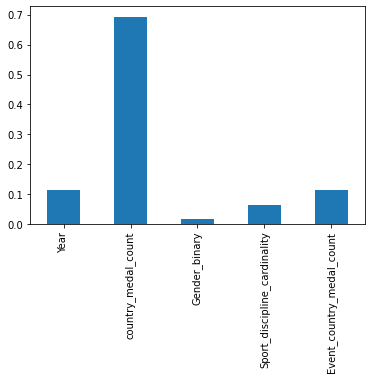

In [133]:
# checking feature importance
forest_importances = pd.Series(forest.feature_importances_, index=validation_data.columns[:-1])
forest_importances.plot(kind = 'bar');

SK learn train-test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html <br>
SK learn random forest classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html <br>
SK learn metrics: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Follow me on Social Media: <br>
YouTube: https://www.youtube.com/channel/UCMQ-E2U2-lXmDOTtlw8P2zQ <br>
GitHub: https://github.com/soumyabrataroy <br>
Medium: https://medium.com/@soumyabrataroy <br>
Quora: https://datadrivendecisions.quora.com/ <br>
LinkedIn: https://www.linkedin.com/in/soumyabratar/
